<a href="https://colab.research.google.com/github/Nishanth004/wind/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
ls ecmwf_data/

20250505000000-0h-oper-fc.grib2
20250505000000-0h-oper-fc.grib2.5b7b6.idx*
20250505000000-12h-oper-fc.grib2
20250505000000-12h-oper-fc.grib2.5b7b6.idx*
20250505000000-18h-oper-fc.grib2
20250505000000-18h-oper-fc.grib2.5b7b6.idx*
20250505000000-24h-oper-fc.grib2
20250505000000-24h-oper-fc.grib2.5b7b6.idx*
20250505000000-6h-oper-fc.grib2
20250505000000-6h-oper-fc.grib2.5b7b6.idx*


In [11]:
!rm 20250501180000-0h-scda-fc.grib2.5b7b6.idx*



In [4]:
!pip install xarray cfgrib eccodes


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 99.0 MB/s eta 0:00:00


In [15]:
import xarray as xr
import pandas as pd
from datetime import datetime

print(f"Script execution start: {datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')}")

# Define level types from the error message
level_types = [
    'soilLayer',
    'isobaricInhPa',
    'heightAboveGround',
    'surface',
    'entireAtmosphere',
    'meanSea',
    'lowCloudLayer',
    'mediumCloudLayer',
    'highCloudLayer',
    'nominalTop',
    'mostUnstableParcel'
]

# Store all variables from all level types
all_variables = []

# Open the dataset with each level type
for level_type in level_types:
    try:
        ds = xr.open_dataset('20250504000000-0h-oper-fc.grib2',
                            engine='cfgrib',
                            filter_by_keys={'typeOfLevel': level_type})

        # Extract information about all variables in this dataset
        for var_name in ds.data_vars:
            var = ds[var_name]
            units = var.attrs.get('units', 'unknown')
            long_name = var.attrs.get('long_name', var.attrs.get('GRIB_name', 'unknown'))
            short_name = var.attrs.get('GRIB_shortName', 'unknown')

            all_variables.append({
                'level_type': level_type,
                'variable': var_name,
                'short_name': short_name,
                'long_name': long_name,
                'units': units,
                'dimensions': ', '.join(var.dims),
                'shape': str(var.shape)
            })

        print(f"✓ Successfully loaded {level_type} level with {len(ds.data_vars)} variables")

    except Exception as e:
        print(f"✗ Could not load {level_type} level: {str(e)[:100]}...")

# Convert to DataFrame for better display
if all_variables:
    var_df = pd.DataFrame(all_variables)

    # Print summary by level type
    level_counts = var_df['level_type'].value_counts()
    print("\n=== Summary of Variables by Level Type ===")
    for level, count in level_counts.items():
        print(f"{level}: {count} variables")

    # Print complete variable list
    print("\n=== Complete List of Variables ===")
    print(var_df[['level_type', 'variable', 'short_name', 'long_name', 'units']].to_string())

    print(f"\nTotal variables found: {len(var_df)}")
else:
    print("No variables were found in the dataset.")

print(f"Script execution end: {datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')}")

/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
ERROR:cfgrib.dataset:skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 641, in dict_me

Script execution start: 2025-05-05 06:21:38
✓ Successfully loaded soilLayer level with 2 variables
✓ Successfully loaded isobaricInhPa level with 6 variables
✓ Successfully loaded heightAboveGround level with 2 variables
✓ Successfully loaded surface level with 12 variables


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


✓ Successfully loaded entireAtmosphere level with 2 variables
✓ Successfully loaded meanSea level with 1 variables
✓ Successfully loaded lowCloudLayer level with 1 variables
✓ Successfully loaded mediumCloudLayer level with 1 variables
✓ Successfully loaded highCloudLayer level with 1 variables
✓ Successfully loaded nominalTop level with 0 variables
✓ Successfully loaded mostUnstableParcel level with 0 variables

=== Summary of Variables by Level Type ===
surface: 12 variables
isobaricInhPa: 6 variables
soilLayer: 2 variables
heightAboveGround: 2 variables
entireAtmosphere: 2 variables
meanSea: 1 variables
lowCloudLayer: 1 variables
mediumCloudLayer: 1 variables
highCloudLayer: 1 variables

=== Complete List of Variables ===
           level_type variable short_name                                          long_name       units
0           soilLayer      vsw        vsw                           Volumetric soil moisture  m**3 m**-3
1           soilLayer      sot        sot              

/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/usr

Successfully loaded 10m wind data

=== Available Wind Data ===

Pressure level winds (isobaricInhPa): [np.float64(1000.0), np.float64(925.0), np.float64(850.0), np.float64(700.0), np.float64(600.0), np.float64(500.0), np.float64(400.0), np.float64(300.0), np.float64(250.0), np.float64(200.0), np.float64(150.0), np.float64(100.0), np.float64(50.0)] hPa

850 hPa wind statistics:
  U component - min: -34.91, max: 42.49, mean: 1.12 m/s
  V component - min: -34.28, max: 29.69, mean: 0.29 m/s
  Wind speed - min: 0.01, max: 43.77, mean: 8.83 m/s


IndexError: 2-dimensional boolean indexing is not supported. 

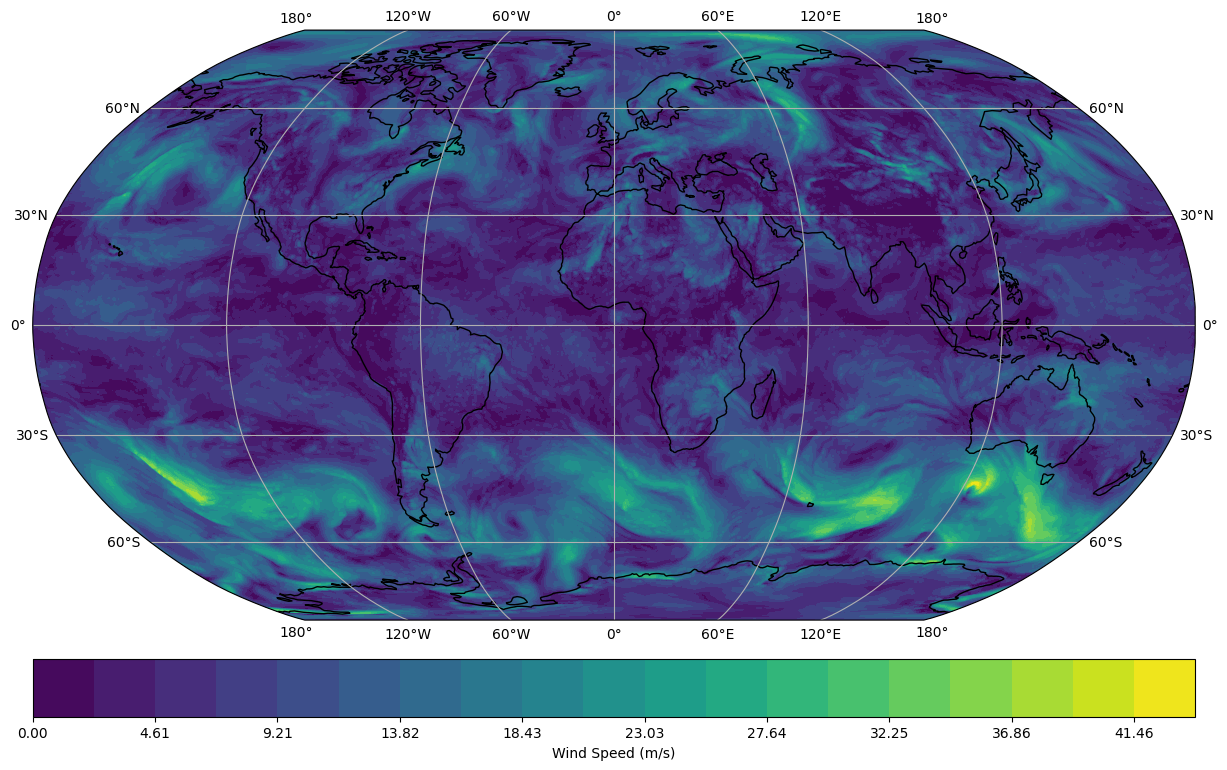

In [18]:
import xarray as xr
import numpy as np
import cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import TwoSlopeNorm

# Set up the figure size and suppress warnings
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15, 10]

# 1. Load wind variables at different levels
# Note: We need specific filter_by_keys combinations to get all wind variables

# Load upper air winds (pressure levels)
ds_pressure = xr.open_dataset('20250504000000-0h-oper-fc.grib2',
                             engine='cfgrib',
                             filter_by_keys={'typeOfLevel': 'isobaricInhPa'})

# Load surface winds at 100m
ds_100m = xr.open_dataset('20250504000000-0h-oper-fc.grib2',
                         engine='cfgrib',
                         filter_by_keys={'typeOfLevel': 'heightAboveGround',
                                        'level': 100})

# For 10m winds - need to use a different approach since they were skipped
try:
    ds_10m = xr.open_dataset('20250504000000-0h-oper-fc.grib2',
                           engine='cfgrib',
                           filter_by_keys={'typeOfLevel': 'heightAboveGround',
                                          'level': 10})
    has_10m_data = True
    print("Successfully loaded 10m wind data")
except:
    has_10m_data = False
    print("Could not load 10m wind data")

# 2. Define functions for wind analysis

def calculate_wind_speed(u, v):
    """Calculate wind speed from U and V components"""
    return np.sqrt(u**2 + v**2)

def calculate_wind_direction(u, v):
    """Calculate meteorological wind direction (degrees from north, clockwise)"""
    # Convert from mathematical angle to meteorological direction
    dir_math = np.arctan2(v, u)  # mathematical angle in radians
    dir_met = 270 - np.degrees(dir_math)  # convert to meteorological direction
    # Ensure directions are in [0, 360) range
    return np.mod(dir_met, 360)

def plot_wind_field(u, v, lons, lats, level_info, skip=20):
    """Plot wind vectors and speed contours"""
    # Calculate wind speed
    wspd = calculate_wind_speed(u, v)

    # Create figure with map projection
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))

    # Add coastlines and gridlines
    ax.coastlines(resolution='110m')
    ax.gridlines(draw_labels=True)

    # Plot wind speed contours
    speed_levels = np.linspace(0, np.max(wspd).item(), 20)
    cs = ax.contourf(lons, lats, wspd, levels=speed_levels,
                     transform=ccrs.PlateCarree(), cmap='viridis')

    # Add colorbar
    cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_label('Wind Speed (m/s)')

    # Plot wind vectors (subsampled for clarity)
    skip = (slice(None, None, skip), slice(None, None, skip))
    ax.quiver(lons[skip[1]], lats[skip[0]], u[skip], v[skip],
              transform=ccrs.PlateCarree(), scale=700, width=0.002)

    plt.title(f'Wind Field at {level_info}')

    return fig

# 3. Analyze and visualize winds at different levels

print("\n=== Available Wind Data ===")

# Upper air winds at selected levels
pressure_levels = [850, 500, 200]  # hPa - common meteorological levels
print(f"\nPressure level winds (isobaricInhPa): {list(ds_pressure.isobaricInhPa.values)} hPa")

for level in pressure_levels:
    if level in ds_pressure.isobaricInhPa.values:
        level_idx = list(ds_pressure.isobaricInhPa.values).index(level)

        # Get U, V at this pressure level
        u = ds_pressure.u.isel(isobaricInhPa=level_idx)
        v = ds_pressure.v.isel(isobaricInhPa=level_idx)

        print(f"\n{level} hPa wind statistics:")
        print(f"  U component - min: {u.min().item():.2f}, max: {u.max().item():.2f}, mean: {u.mean().item():.2f} m/s")
        print(f"  V component - min: {v.min().item():.2f}, max: {v.max().item():.2f}, mean: {v.mean().item():.2f} m/s")

        # Calculate and display wind speed statistics
        wspd = calculate_wind_speed(u, v)
        print(f"  Wind speed - min: {wspd.min().item():.2f}, max: {wspd.max().item():.2f}, mean: {wspd.mean().item():.2f} m/s")

        # Plot this pressure level
        fig = plot_wind_field(u, v, ds_pressure.longitude, ds_pressure.latitude, f"{level} hPa")
        plt.tight_layout()
        plt.show()

# 100m winds
if 'u100' in ds_100m and 'v100' in ds_100m:
    print("\n100m wind statistics:")
    print(f"  U component - min: {ds_100m.u100.min().item():.2f}, max: {ds_100m.u100.max().item():.2f}, mean: {ds_100m.u100.mean().item():.2f} m/s")
    print(f"  V component - min: {ds_100m.v100.min().item():.2f}, max: {ds_100m.v100.max().item():.2f}, mean: {ds_100m.v100.mean().item():.2f} m/s")

    # Calculate and display wind speed statistics
    wspd_100m = calculate_wind_speed(ds_100m.u100, ds_100m.v100)
    print(f"  Wind speed - min: {wspd_100m.min().item():.2f}, max: {wspd_100m.max().item():.2f}, mean: {wspd_100m.mean().item():.2f} m/s")

    # Plot 100m winds
    fig = plot_wind_field(ds_100m.u100, ds_100m.v100, ds_100m.longitude, ds_100m.latitude, "100 meters")
    plt.tight_layout()
    plt.show()

# 10m winds if available
if has_10m_data and 'u10' in ds_10m and 'v10' in ds_10m:
    print("\n10m wind statistics:")
    print(f"  U component - min: {ds_10m.u10.min().item():.2f}, max: {ds_10m.u10.max().item():.2f}, mean: {ds_10m.u10.mean().item():.2f} m/s")
    print(f"  V component - min: {ds_10m.v10.min().item():.2f}, max: {ds_10m.v10.max().item():.2f}, mean: {ds_10m.v10.mean().item():.2f} m/s")

    # Calculate and display wind speed statistics
    wspd_10m = calculate_wind_speed(ds_10m.u10, ds_10m.v10)
    print(f"  Wind speed - min: {wspd_10m.min().item():.2f}, max: {wspd_10m.max().item():.2f}, mean: {wspd_10m.mean().item():.2f} m/s")

    # Plot 10m winds
    fig = plot_wind_field(ds_10m.u10, ds_10m.v10, ds_10m.longitude, ds_10m.latitude, "10 meters")
    plt.tight_layout()
    plt.show()
else:
    print("\nNo 10m wind data available")

# 4. Advanced: Create a vertical cross-section of winds along a latitude
latitude_idx = len(ds_pressure.latitude) // 2  # Choose equator or another reference latitude
selected_lat = ds_pressure.latitude[latitude_idx].item()

# Create a vertical cross-section plot
plt.figure(figsize=(15, 8))

# Get all pressure levels and convert to appropriate vertical coordinate
p_levels = ds_pressure.isobaricInhPa.values
u_xsection = ds_pressure.u.isel(latitude=latitude_idx)
v_xsection = ds_pressure.v.isel(latitude=latitude_idx)
wspd_xsection = calculate_wind_speed(u_xsection, v_xsection)

# Create the contourf plot
levels = np.linspace(0, min(50, wspd_xsection.max().item()), 21)
cs = plt.contourf(ds_pressure.longitude, p_levels, wspd_xsection, levels=levels, cmap='viridis')
plt.colorbar(cs, label='Wind Speed (m/s)')

# Make y-axis reversed (pressure decreases with height) and logarithmic (for better vertical resolution)
plt.gca().invert_yaxis()
plt.yscale('log')

# Add wind barbs (subsampled)
barb_skip = 40  # Adjust based on your resolution
plt.barbs(ds_pressure.longitude[::barb_skip], p_levels,
         u_xsection[:, ::barb_skip], v_xsection[:, ::barb_skip],
         length=5, linewidth=0.5)

plt.title(f'Vertical Cross-Section of Wind at Latitude {selected_lat}°')
plt.xlabel('Longitude')
plt.ylabel('Pressure (hPa)')
plt.tight_layout()
plt.show()

In [19]:
import xarray as xr
import pandas as pd
import numpy as np
import os

# Create a directory for CSV files
output_dir = 'wind_data_csv'
os.makedirs(output_dir, exist_ok=True)

# Silence warnings
import warnings
warnings.filterwarnings('ignore')

# Dictionary to store all datasets we'll load
datasets = {}

# 1. Load datasets with different level types
print("Loading datasets...")

# Pressure levels
try:
    datasets['pressure'] = xr.open_dataset('20250504000000-0h-oper-fc.grib2',
                                          engine='cfgrib',
                                          filter_by_keys={'typeOfLevel': 'isobaricInhPa'})
    print("✓ Loaded pressure level data")
except Exception as e:
    print(f"✗ Could not load pressure level data: {str(e)[:100]}")

# 100m winds
try:
    datasets['100m'] = xr.open_dataset('20250504000000-0h-oper-fc.grib2',
                                      engine='cfgrib',
                                      filter_by_keys={'typeOfLevel': 'heightAboveGround', 'level': 100})
    print("✓ Loaded 100m wind data")
except Exception as e:
    print(f"✗ Could not load 100m data: {str(e)[:100]}")

# 10m winds
try:
    datasets['10m'] = xr.open_dataset('20250504000000-0h-oper-fc.grib2',
                                     engine='cfgrib',
                                     filter_by_keys={'typeOfLevel': 'heightAboveGround', 'level': 10})
    print("✓ Loaded 10m wind data")
except Exception as e:
    print(f"✗ Could not load 10m data: {str(e)[:100]}")

# Surface data
try:
    datasets['surface'] = xr.open_dataset('20250504000000-0h-oper-fc.grib2',
                                        engine='cfgrib',
                                        filter_by_keys={'typeOfLevel': 'surface'})
    print("✓ Loaded surface data")
except Exception as e:
    print(f"✗ Could not load surface data: {str(e)[:100]}")

# 2. Export to CSV files

print("\nExporting data to CSV files...")

# Function to export 2D data (lat-lon grid)
def export_2d_data_to_csv(data_array, filename, max_rows=10000):
    """
    Export a 2D data array to CSV with latitude and longitude as columns
    Limits the number of rows to prevent excessively large files
    """
    # Create a 2D mesh of coordinates
    lats, lons = np.meshgrid(data_array.latitude.values, data_array.longitude.values, indexing='ij')

    # Create a dataframe
    df = pd.DataFrame({
        'latitude': lats.flatten(),
        'longitude': lons.flatten(),
        'value': data_array.values.flatten()
    })

    # Limit rows if necessary
    if len(df) > max_rows:
        print(f"  - Limiting {filename} to {max_rows} rows (from {len(df)} total)")
        df = df.sample(n=max_rows, random_state=42)

    # Save to CSV
    df.to_csv(os.path.join(output_dir, filename), index=False)
    print(f"  - Saved {filename} ({len(df)} rows)")

# Function to export 3D data (pressure level data)
def export_3d_data_to_csv(data_array, base_filename, level_dim='isobaricInhPa', max_rows=10000):
    """
    Export 3D data to separate CSV files, one for each level
    """
    for i, level in enumerate(data_array[level_dim].values):
        # Extract data for this level
        level_data = data_array.isel({level_dim: i})

        # Create filename
        filename = f"{base_filename}_{level}.csv"

        # Export as 2D
        export_2d_data_to_csv(level_data, filename, max_rows)

# Export wind data from each dataset
print("\nExporting wind data:")

# Process pressure level data
if 'pressure' in datasets:
    # U wind component
    if 'u' in datasets['pressure']:
        print("\n- Exporting U wind component at pressure levels:")
        export_3d_data_to_csv(datasets['pressure'].u, 'u_wind_pressure')

    # V wind component
    if 'v' in datasets['pressure']:
        print("\n- Exporting V wind component at pressure levels:")
        export_3d_data_to_csv(datasets['pressure'].v, 'v_wind_pressure')

    # Calculate and export wind speed at a few selected levels (to save space)
    print("\n- Calculating and exporting wind speed at selected pressure levels:")
    selected_levels = [850, 500, 200]  # Common meteorological levels

    for level in selected_levels:
        if level in datasets['pressure'].isobaricInhPa.values:
            level_idx = list(datasets['pressure'].isobaricInhPa.values).index(level)

            # Extract U and V at this level
            u = datasets['pressure'].u.isel(isobaricInhPa=level_idx)
            v = datasets['pressure'].v.isel(isobaricInhPa=level_idx)

            # Calculate wind speed
            wspd = np.sqrt(u**2 + v**2)
            wspd = wspd.rename('wind_speed')

            # Export
            export_2d_data_to_csv(wspd, f'wind_speed_{level}hPa.csv')

# Export 100m wind data
if '100m' in datasets:
    print("\n- Exporting 100m wind data:")

    # U component
    if 'u100' in datasets['100m']:
        export_2d_data_to_csv(datasets['100m'].u100, 'u_wind_100m.csv')

    # V component
    if 'v100' in datasets['100m']:
        export_2d_data_to_csv(datasets['100m'].v100, 'v_wind_100m.csv')

    # Calculate and export wind speed
    if 'u100' in datasets['100m'] and 'v100' in datasets['100m']:
        wspd = np.sqrt(datasets['100m'].u100**2 + datasets['100m'].v100**2)
        wspd = wspd.rename('wind_speed')
        export_2d_data_to_csv(wspd, 'wind_speed_100m.csv')

# Export 10m wind data
if '10m' in datasets:
    print("\n- Exporting 10m wind data:")

    # U component
    if 'u10' in datasets['10m']:
        export_2d_data_to_csv(datasets['10m'].u10, 'u_wind_10m.csv')

    # V component
    if 'v10' in datasets['10m']:
        export_2d_data_to_csv(datasets['10m'].v10, 'v_wind_10m.csv')

    # Calculate and export wind speed
    if 'u10' in datasets['10m'] and 'v10' in datasets['10m']:
        wspd = np.sqrt(datasets['10m'].u10**2 + datasets['10m'].v10**2)
        wspd = wspd.rename('wind_speed')
        export_2d_data_to_csv(wspd, 'wind_speed_10m.csv')

# Export metadata about the dataset
print("\nExporting dataset metadata:")

# Create summary file with information about available variables
with open(os.path.join(output_dir, 'dataset_info.txt'), 'w') as f:
    f.write("Dataset Information\n")
    f.write("=================\n\n")

    f.write("Available Level Types:\n")
    for name, ds in datasets.items():
        f.write(f"- {name}: {len(ds.data_vars)} variables\n")

    f.write("\nWind Variables Details:\n")
    for name, ds in datasets.items():
        f.write(f"\n{name.upper()} LEVEL:\n")
        for var_name in ds.data_vars:
            if any(wind_term in var_name for wind_term in ['u', 'v', 'w', 'wind']):
                var = ds[var_name]
                units = var.attrs.get('units', 'unknown')
                long_name = var.attrs.get('long_name', var.attrs.get('GRIB_name', 'unknown'))
                f.write(f"  - {var_name}: {long_name} ({units})\n")
                f.write(f"    Dimensions: {var.dims}, Shape: {var.shape}\n")
                f.write(f"    Min: {var.min().item():.2f}, Max: {var.max().item():.2f}, Mean: {var.mean().item():.2f}\n")

print(f"\nAll data exported to the '{output_dir}' directory.")
print(f"Check '{output_dir}/dataset_info.txt' for an overview of the data.")

Loading datasets...
✓ Loaded pressure level data
✓ Loaded 100m wind data
✓ Loaded 10m wind data
✓ Loaded surface data

Exporting data to CSV files...

Exporting wind data:

- Exporting U wind component at pressure levels:
  - Limiting u_wind_pressure_1000.0.csv to 10000 rows (from 1038240 total)
  - Saved u_wind_pressure_1000.0.csv (10000 rows)
  - Limiting u_wind_pressure_925.0.csv to 10000 rows (from 1038240 total)
  - Saved u_wind_pressure_925.0.csv (10000 rows)
  - Limiting u_wind_pressure_850.0.csv to 10000 rows (from 1038240 total)
  - Saved u_wind_pressure_850.0.csv (10000 rows)
  - Limiting u_wind_pressure_700.0.csv to 10000 rows (from 1038240 total)
  - Saved u_wind_pressure_700.0.csv (10000 rows)
  - Limiting u_wind_pressure_600.0.csv to 10000 rows (from 1038240 total)
  - Saved u_wind_pressure_600.0.csv (10000 rows)
  - Limiting u_wind_pressure_500.0.csv to 10000 rows (from 1038240 total)
  - Saved u_wind_pressure_500.0.csv (10000 rows)
  - Limiting u_wind_pressure_400.0.csv

In [17]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 73.8 MB/s eta 0:00:00


In [11]:
import xarray as xr

ds = xr.open_dataset('20250501180000-0h-scda-fc.grib2', engine='cfgrib')

# Show general dataset info
print(ds)

# Show variables
print(ds.variables)


ERROR:cfgrib.dataset:skipping variable: paramId==228026 shortName='mx2t3'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='step' value=Variable(dimensions=(), data=np.float64(0.0)) new_value=Variable(dimensions=(), data=np.float64(3.0))
ERROR:cfgrib.dataset:skipping variable: paramId==228027 shortName='mn2t3'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value

<xarray.Dataset> Size: 640MB
Dimensions:             (latitude: 721, longitude: 1440, isobaricInhPa: 13,
                         soilLayer: 4)
Coordinates: (12/13)
    time                datetime64[ns] 8B ...
    step                timedelta64[ns] 8B ...
    surface             float64 8B ...
  * latitude            (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude           (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time          datetime64[ns] 8B ...
    ...                  ...
    entireAtmosphere    float64 8B ...
  * soilLayer           (soilLayer) float64 32B 1.0 2.0 3.0 4.0
    nominalTop          float64 8B ...
    heightAboveGround   float64 8B ...
    mostUnstableParcel  float64 8B ...
    meanSea             float64 8B ...
Data variables: (12/40)
    asn                 (latitude, longitude) float32 4MB ...
    lsm                 (latitude, longitude) float32 4MB ...
    q                   (isobaricInhPa, latitude, longitude) f

/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


In [1]:
import xarray as xr
import pandas as pd
from google.colab import files

# Define the filename of your GRIB2 file
grib2_file = "20250501180000-0h-scda-fc.grib2"

# Define the variables you want to extract (shortName values)
variables = {
    "u10": "10m_u_wind.csv",
    "v10": "10m_v_wind.csv",
    "u100": "100m_u_wind.csv",
    "v100": "100m_v_wind.csv",
    "t2m": "2m_temperature.csv",
    "d2m": "2m_dewpoint.csv",
    "mx2t3": "3h_max_temperature_2m.csv",
    "mn2t3": "3h_min_temperature_2m.csv",
}

# Loop through each variable, extract, convert, and save to CSV
for short_name, csv_name in variables.items():
    try:
        print(f"Processing: {short_name}")
        ds = xr.open_dataset(
            grib2_file,
            engine="cfgrib",
            backend_kwargs={"filter_by_keys": {"shortName": short_name}}
        )
        df = ds.to_dataframe().reset_index()
        df.to_csv(csv_name, index=False)
        files.download(csv_name)
    except Exception as e:
        print(f"Failed to process {short_name}: {e}")


Processing: u10
Failed to process u10: no valid index for a 0-dimensional object
Processing: v10
Failed to process v10: no valid index for a 0-dimensional object
Processing: u100
Failed to process u100: no valid index for a 0-dimensional object
Processing: v100
Failed to process v100: no valid index for a 0-dimensional object
Processing: t2m
Failed to process t2m: no valid index for a 0-dimensional object
Processing: d2m
Failed to process d2m: no valid index for a 0-dimensional object
Processing: mx2t3


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing: mn2t3


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
!rm *.idx

Downloaded 20250505000000-0h-oper-fc.grib2
Failed to download 20250505000000-3h-oper-fc.grib2: Status code 404
Downloaded 20250505000000-6h-oper-fc.grib2
Failed to download 20250505000000-9h-oper-fc.grib2: Status code 404
Downloaded 20250505000000-12h-oper-fc.grib2
Failed to download 20250505000000-15h-oper-fc.grib2: Status code 404
Downloaded 20250505000000-18h-oper-fc.grib2
Failed to download 20250505000000-21h-oper-fc.grib2: Status code 404


ERROR:cfgrib.dataset:skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(100.0)) new_value=Variable(dimensions=(), data=np.float64(10.0))
ERROR:cfgrib.dataset:skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new

Downloaded 20250505000000-24h-oper-fc.grib2


ERROR:cfgrib.dataset:skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(100.0)) new_value=Variable(dimensions=(), data=np.float64(2.0))
ERROR:cfgrib.dataset:skipping variable: paramId==168 shortName='d2m'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new 

Variable u10 not found in ecmwf_data/20250505000000-0h-oper-fc.grib2


ERROR:cfgrib.dataset:skipping variable: paramId==228247 shortName='v100'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=np.float64(10.0)) new_value=Variable(dimensions=(), data=np.float64(100.0))
ERROR:cfgrib.dataset:skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/usr/local/lib/python3.11/dist-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and

Variable v10 not found in ecmwf_data/20250505000000-0h-oper-fc.grib2


TypeError: Input z must be 2D, not 3D

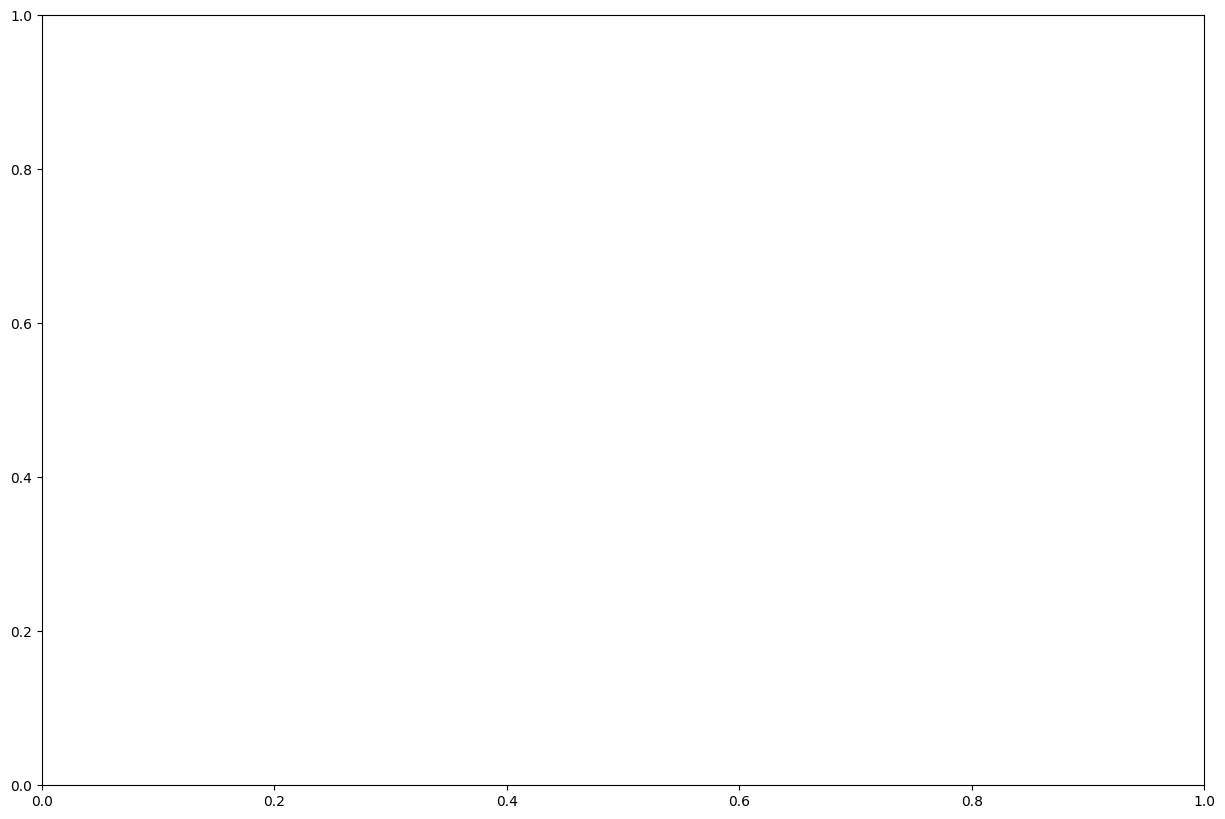

In [28]:
import os
import requests
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Configuration
base_url = "https://data.ecmwf.int/forecasts"
output_dir = "ecmwf_data"
os.makedirs(output_dir, exist_ok=True)

def get_latest_run_date():
    """Determine the latest available model run date and time"""
    now = datetime.utcnow()

    # ECMWF typically has a ~5-6 hour delay for data availability
    # So subtract 6 hours from current time to get a safe reference point
    reference_time = now - timedelta(hours=6)

    # Determine which of the 4 daily runs (00, 06, 12, 18) is most recent
    hour = reference_time.hour
    if hour < 6:
        run_hour = "00"
    elif hour < 12:
        run_hour = "06"
    elif hour < 18:
        run_hour = "12"
    else:
        run_hour = "18"

    # If we've gone back to a previous day
    if run_hour == "00" and hour > 18:
        run_date = reference_time - timedelta(days=1)
    else:
        run_date = reference_time

    return run_date.strftime("%Y%m%d"), run_hour

def download_latest_data(steps=[0, 3, 6, 9, 12, 15, 18, 21, 24]):
    """Download the latest available forecast data for the given steps"""
    date_str, hour = get_latest_run_date()
    model = "aifs-single"  # or "ifs" depending on what you need
    resolution = "0p25"
    stream = "oper"
    type_str = "fc"

    downloaded_files = []

    for step in steps:
        # Construct filename
        filename = f"{date_str}{hour}0000-{step}h-{stream}-{type_str}.grib2"
        url = f"{base_url}/{date_str}/{hour}z/{model}/{resolution}/{stream}/{filename}"
        output_path = os.path.join(output_dir, filename)

        # Download if file doesn't exist
        if not os.path.exists(output_path):
            print(f"Downloading {url}...")
            try:
                response = requests.get(url)
                if response.status_code == 200:
                    with open(output_path, 'wb') as f:
                        f.write(response.content)
                    print(f"Downloaded {filename}")
                    downloaded_files.append(output_path)
                else:
                    print(f"Failed to download {filename}: Status code {response.status_code}")
            except Exception as e:
                print(f"Error downloading {filename}: {str(e)}")
        else:
            print(f"File already exists: {filename}")
            downloaded_files.append(output_path)

    return downloaded_files

def create_continuous_dataset(files, variable='u10'):
    """Create a continuous dataset from multiple forecast steps"""
    datasets = []

    for file in sorted(files):
        try:
            # Extract forecast step from filename
            step = int(file.split('-')[1].replace('h', ''))

            # Open dataset with filter for the variable we want
            ds = xr.open_dataset(file, engine='cfgrib',
                                filter_by_keys={'typeOfLevel': 'heightAboveGround'})

            if variable in ds:
                # Add the actual valid time
                valid_time = ds.time.values + np.timedelta64(step, 'h')
                ds = ds.assign_coords({"valid_time": valid_time})

                # Select only the variable we want
                ds_var = ds[variable].to_dataset()
                datasets.append(ds_var)
            else:
                print(f"Variable {variable} not found in {file}")

        except Exception as e:
            print(f"Error processing {file}: {str(e)}")

    if datasets:
        # Combine all forecast steps into one dataset
        combined_ds = xr.concat(datasets, dim="valid_time")
        return combined_ds
    else:
        print("No valid datasets found")
        return None

def update_data_loop(interval_minutes=60, wind_vars=['u10', 'v10']):
    """Continuously update data at specified interval"""
    while True:
        print(f"\n=== Updating data at {datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')} ===")

        # Download latest data
        files = download_latest_data()

        # Process and visualize if files were downloaded
        if files:
            # Create datasets for wind components
            u_ds = create_continuous_dataset(files, 'u10')
            v_ds = create_continuous_dataset(files, 'v10')

            if u_ds is not None and v_ds is not None:
                # Calculate wind speed
                wind_speed = np.sqrt(u_ds.u10**2 + v_ds.v10**2)

                # Create or update visualization
                create_wind_visualization(u_ds.u10, v_ds.v10, wind_speed)

        # Wait for next update
        print(f"Next update in {interval_minutes} minutes")
        time.sleep(interval_minutes * 60)

def create_wind_visualization(u, v, speed):
    """Create visualization of wind data"""
    plt.figure(figsize=(15, 10))

    # Skip points for clearer vector display
    skip = 20

    # Plot wind speed as background
    cs = plt.contourf(u.longitude, u.latitude, speed,
                     levels=np.linspace(0, np.max(speed).item(), 20),
                     cmap='viridis')

    # Plot wind vectors
    plt.quiver(u.longitude[::skip], u.latitude[::skip],
              u.values[::skip, ::skip], v.values[::skip, ::skip],
              scale=700)

    plt.colorbar(cs, label='Wind Speed (m/s)')
    plt.title(f'Wind Field - Valid at {pd.to_datetime(u.valid_time.values).strftime("%Y-%m-%d %H:%M")} UTC')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)

    # Save the plot with timestamp
    timestamp = pd.to_datetime(u.valid_time.values).strftime("%Y%m%d_%H%M")
    plt.savefig(f"wind_field_{timestamp}.png")
    plt.close()

# Example usage
if __name__ == "__main__":
    # For one-time download and visualization:
    files = download_latest_data(steps=[0, 3, 6, 9, 12, 15, 18, 21, 24])
    u_ds = create_continuous_dataset(files, 'u10')
    v_ds = create_continuous_dataset(files, 'v10')
    if u_ds is not None and v_ds is not None:
        wind_speed = np.sqrt(u_ds.u10**2 + v_ds.v10**2)
        create_wind_visualization(u_ds.u10, v_ds.v10, wind_speed)

    # For continuous updates (uncomment to use):
    # update_data_loop(interval_minutes=60)  # Update every hour

# Welcome to Colab!

## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.

**How to get started?**
*  Go to [Google AI Studio](https://aistudio.google.com/) and log in with your Google account.
*  [Create an API key](https://aistudio.google.com/app/apikey).
* Use a quickstart for [Python](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb), or call the REST API using [curl](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb).

**Discover Gemini's advanced capabilities**
*  Play with Gemini [multimodal outputs](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb), mixing text and images in an iterative way.
*  Discover the [multimodal Live API](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb ) (demo [here](https://aistudio.google.com/live)).
*  Learn how to [analyze images and detect items in your pictures](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb") using Gemini (bonus, there's a [3D version](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb) as well!).
*  Unlock the power of [Gemini thinking model](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb), capable of solving complex task with its inner thoughts.
      
**Explore complex use cases**
*  Use [Gemini grounding capabilities](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb) to create a report on a company based on what the model can find on internet.
*  Extract [invoices and form data from PDF](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb) in a structured way.
*  Create [illustrations based on a whole book](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb) using Gemini large context window and Imagen.

To learn more, check out the [Gemini cookbook](https://github.com/google-gemini/cookbook) or visit the [Gemini API documentation](https://ai.google.dev/docs/).


Colab now has AI features powered by [Gemini](https://gemini.google.com). The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  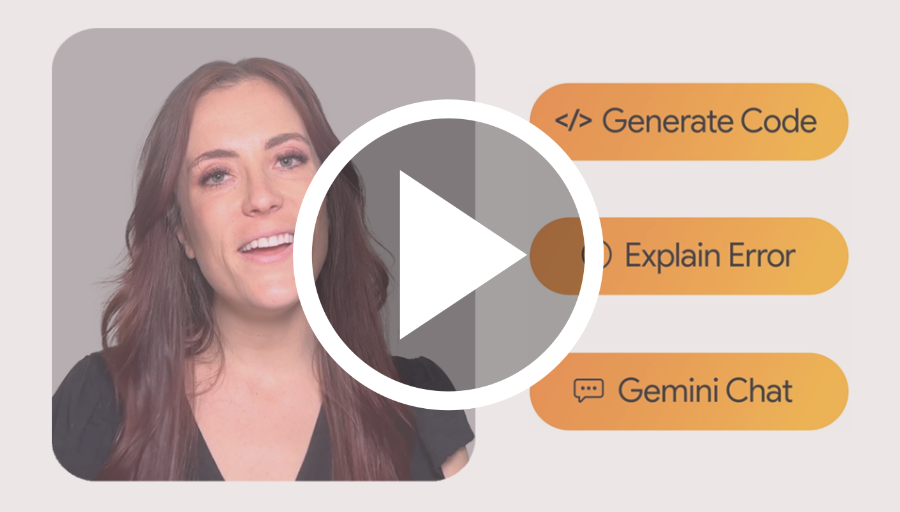
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

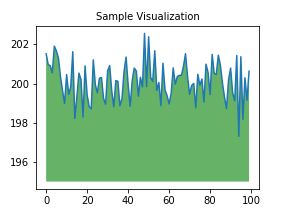

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
